# Logistic Regression


This notebook implements logistic regression, a supervised learning technique for binary classification. This regression algorithm estimates the probability that an instance belongs to a particular class. Specifically, given a set of input features, the logistic regression model produces an estimated probability of belonging to the *positive* class. If this estimated probability is at least 50%, then the instance is predicted to belong to this positive class; otherwise it is predicted to belong to the *negative* class.

---

First, load the relevant libraries needed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boundaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

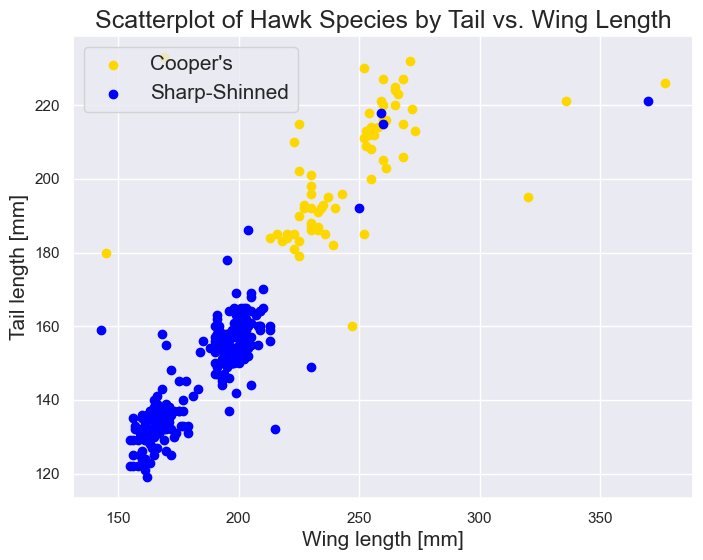

In [2]:
# Read in the data and subset it to the relevant columns/observations
df = pd.read_csv("Data/hawks.csv")
df = df[["Species", "Wing", "Tail"]].dropna(axis=0)
df

#RT = df[df.Species == "RT"]
CH = df[df.Species == "CH"]
SS = df[df.Species == "SS"]

plt.figure(figsize = (8, 6))
#plt.scatter(RT.Wing, RT.Tail, color = "red", label = "Red-tailed")
plt.scatter(CH.Wing, CH.Tail, color = "gold", label = "Cooper's")
plt.scatter(SS.Wing, SS.Tail, color = "blue", label = "Sharp-Shinned")
plt.title("Scatterplot of Hawk Species by Tail vs. Wing Length", fontsize = 18)
plt.xlabel("Wing length [mm]", fontsize = 15)
plt.ylabel("Tail length [mm]", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.show()

### Single Input Logistic Regression 

In [3]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

domain = np.linspace(-12.0, 12.0, 100)

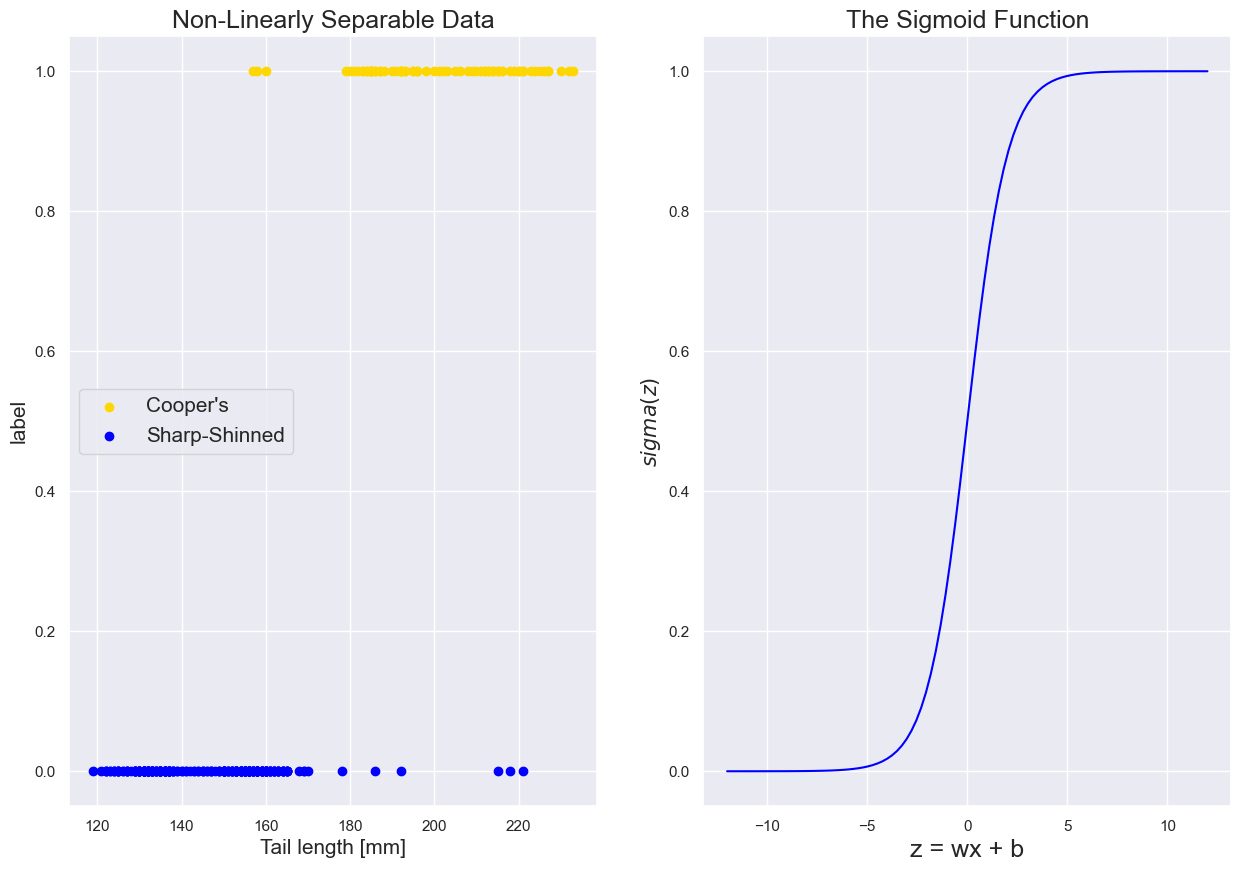

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
#ax1.set_xlim((2.75, 7))
ax1.scatter(CH.Tail, 
            np.ones(len(CH.Tail)), 
            color = "gold", 
            label = "Cooper's")
ax1.scatter(SS.Tail, 
            np.zeros(len(SS.Tail)), 
            color = "blue", 
            label = "Sharp-Shinned")
ax1.set_xlabel("Tail length [mm]", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Separable Data", fontsize = 18)
ax1.legend(fontsize = 15, loc = "center left")

ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

### Using scikit-learn

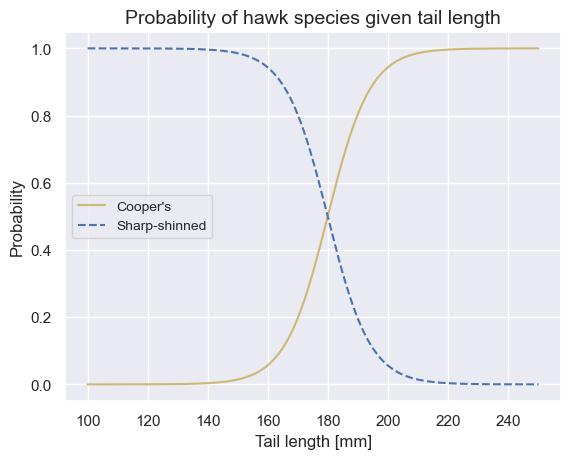

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
data = df[df.Species != "RT"]
X = data["Tail"].values.reshape(-1, 1)
y = (data["Species"] == "CH").astype(int)
log_reg.fit(X, y)

X_new = np.linspace(100, 250, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "y-", label="Cooper's") 
plt.plot(X_new, y_proba[:, 0], "b--", label="Sharp-shinned")
plt.legend(fontsize = 10, loc = "center left")
plt.xlabel("Tail length [mm]", fontsize = 12)
plt.ylabel("Probability", fontsize = 12)
plt.title("Probability of hawk species given tail length", fontsize = 14)
plt.show()